# <center><font color="#fc3503">  **AI generated phishing emails detection using machine learning algorithms**

# <left><font color="#257008"> **Introduction**

Phishing is a prevalent and significant form of cybercrime that poses a substantial threat to both individuals and organizations. It involves sending deceptive emails with the intent of tricking recipients into divulging sensitive information, such as passwords or financial details, or to gain unauthorized access to systems. With advancements in Artificial Intelligence (AI), cybercriminals have started using Large Language Models (LLMs) to generate highly sophisticated phishing emails. These AI-generated phishing emails are more convincing and harder to detect due to their improved language proficiency, grammar, and personalization.

The emergence of AI-driven phishing emails presents a new challenge for cybersecurity professionals. Traditional methods of phishing detection may not be as effective against these advanced techniques. Therefore, there is a critical need to develop more sophisticated methods to identify and mitigate the risks posed by AI-generated phishing attacks. This project aims to address this challenge by leveraging machine learning algorithms to distinguish between legitimate emails and AI-generated phishing emails accurately.


To begin our analysis, we'll first import the necessary libraries that will be used throughout the project. These libraries will help us with data manipulation, visualization, natural language processing (NLP), machine learning, and performance evaluation.

## <left><font color="#257008"> **To begin our analysis, we'll first import the libraries we'll be using in this project.**

In [1]:
# import basic libraries
import re
import time
import string
import joblib
import numpy as np
import pandas as pd

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


# NLP tools
import nltk
from nltk.corpus import stopwords

# necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


# wordcloud
from wordcloud import WordCloud, STOPWORDS

# Tokenizes strings into words
from nltk.tokenize import word_tokenize

# Converts words to base form
from nltk.stem import WordNetLemmatizer

# for splitiing the data
from sklearn.model_selection import train_test_split

# label encoding
from sklearn.preprocessing import LabelEncoder

# for feature extraction
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# ml libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# for hyperparameters
from sklearn.model_selection import GridSearchCV

# performance evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# <center><u><font color="#fc3503"> **Load The Dataset**

## <left><font color="#257008"> **Human Phishing Dataset**

In [2]:
human_phishing = pd.read_csv('dataset/human_phishing.csv')
human_phishing.head()

,sender,receiver,date,subject,body,urls,label
0,MetaMask <info@sofamekar.com>,jose@monkey.org,2022-12-27 10:56:49,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,1
1,MetaMask <info@sofamekar.com>,jose@monkey.org,2022-12-27 10:56:49,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,1
2,Fastway\n\t<info.fastway.co.za_info.fastway.co...,jose@monkey.org,2022-12-21 01:33:32,Your shipment is on the way,Announcing JotForm Tables: When a spreadsheet ...,1,1
3,Fastway\n\t<info.fastway.co.za_info.fastway.co...,jose@monkey.org,2022-12-21 01:33:32,Your shipment is on the way,Announcing JotForm Tables: When a spreadsheet ...,1,1
4,Help Center\n\t<info.help-center.co.za_info.he...,jose@monkey.org,2022-12-20 23:00:27,Netflix : We're having some trouble with your ...,"HELLO, Please note that, your monthly paymen...",1,1


In [3]:
# change column name body to text in human phishing dataset
human_phishing.rename(columns={'body': 'text'}, inplace=True)
human_phishing.head()

,sender,receiver,date,subject,text,urls,label
0,MetaMask <info@sofamekar.com>,jose@monkey.org,2022-12-27 10:56:49,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,1
1,MetaMask <info@sofamekar.com>,jose@monkey.org,2022-12-27 10:56:49,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,1
2,Fastway\n\t<info.fastway.co.za_info.fastway.co...,jose@monkey.org,2022-12-21 01:33:32,Your shipment is on the way,Announcing JotForm Tables: When a spreadsheet ...,1,1
3,Fastway\n\t<info.fastway.co.za_info.fastway.co...,jose@monkey.org,2022-12-21 01:33:32,Your shipment is on the way,Announcing JotForm Tables: When a spreadsheet ...,1,1
4,Help Center\n\t<info.help-center.co.za_info.he...,jose@monkey.org,2022-12-20 23:00:27,Netflix : We're having some trouble with your ...,"HELLO, Please note that, your monthly paymen...",1,1


In [4]:
# extract only main columns from human_phishing dataset
human_phishing = human_phishing[["text", "label"]]
human_phishing.head()

,text,label
0,Verify your MetaMask Wallet Our system has sho...,1
1,Verify your MetaMask Wallet Our system has sho...,1
2,Announcing JotForm Tables: When a spreadsheet ...,1
3,Announcing JotForm Tables: When a spreadsheet ...,1
4,"HELLO, Please note that, your monthly paymen...",1


## <left><font color="#257008"> **Human Legit Dataset**

In [5]:
human_legit = pd.read_csv('dataset/human_legit.csv')
human_legit.head()

,sender,receiver,date,subject,body,urls,label
0,Jesus Miguel Recuenco Ezquerra <JMRECU@telelin...,handy board <handyboard@media.mit.edu>,2019-10-29 22:53:50,Starting IC with wizard,Hi\r\n\r\n\t\tI am running the IR test program...,0,0
1,Trade Me <xfnbqb@trademe.co.nz>,user2.4@gvc.ceas-challenge.cc,2008-08-06 13:53:26,Trade Me -- A question on your auction: Auctio...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...,0,0
2,Trade Me <xfnbqb@trademe.co.nz>,user2.4@gvc.ceas-challenge.cc,2008-08-06 13:45:53,Trade Me - A request from a Trade Me member. A...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nTrade ...,0,0
3,Kevin Jacobson <wffjeanja@northtec.ac.nz>,user2.1@gvc.ceas-challenge.cc,2008-08-06 13:43:27,RE: NorthTec Account/Password,"Hi Tony\r\nNot sure why it didn't work, but I ...",1,0
4,Albert van Aardt <zfdrqfguo@northtec.ac.nz>,user2.1@gvc.ceas-challenge.cc,2008-08-06 13:26:57,2008 timetable,Kindly suggest changes\r\n\r\n----------------...,0,0


In [6]:
# change column name body to text in human legit dataset
human_legit.rename(columns={'body': 'text'}, inplace=True)
human_legit.head()

,sender,receiver,date,subject,text,urls,label
0,Jesus Miguel Recuenco Ezquerra <JMRECU@telelin...,handy board <handyboard@media.mit.edu>,2019-10-29 22:53:50,Starting IC with wizard,Hi\r\n\r\n\t\tI am running the IR test program...,0,0
1,Trade Me <xfnbqb@trademe.co.nz>,user2.4@gvc.ceas-challenge.cc,2008-08-06 13:53:26,Trade Me -- A question on your auction: Auctio...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...,0,0
2,Trade Me <xfnbqb@trademe.co.nz>,user2.4@gvc.ceas-challenge.cc,2008-08-06 13:45:53,Trade Me - A request from a Trade Me member. A...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nTrade ...,0,0
3,Kevin Jacobson <wffjeanja@northtec.ac.nz>,user2.1@gvc.ceas-challenge.cc,2008-08-06 13:43:27,RE: NorthTec Account/Password,"Hi Tony\r\nNot sure why it didn't work, but I ...",1,0
4,Albert van Aardt <zfdrqfguo@northtec.ac.nz>,user2.1@gvc.ceas-challenge.cc,2008-08-06 13:26:57,2008 timetable,Kindly suggest changes\r\n\r\n----------------...,0,0


In [7]:
# extract only main columns from human_legit dataset
human_legit = human_legit[["text", "label"]]
human_legit.head()

,text,label
0,Hi\r\n\r\n\t\tI am running the IR test program...,0
1,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...,0
2,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nTrade ...,0
3,"Hi Tony\r\nNot sure why it didn't work, but I ...",0
4,Kindly suggest changes\r\n\r\n----------------...,0


## <left><font color="#257008"> **LLM  Legit Dataset**

In [8]:
llm_legit = pd.read_csv('dataset/legit_llm.csv')
llm_legit.head()

,text,label
0,"Dear Michael, I hope this message finds you we...",1
1,"Dear Jennifer, We hope you're doing well. We'r...",1
2,"Dear Robert, Your attention is urgently requir...",1
3,"Dear Emily, We're writing to remind you of the...",1
4,"Dear William, We need your immediate attention...",1


## <left><font color="#257008"> **LLM  Phishing Dataset**

In [9]:
# read the llm data
with open('dataset/phishing_llm.csv', 'r') as file:
    lines = file.readlines()

# header row not needed
lines = lines[1:]

# Processing each line to merge columns except the last one
data = []
for line in lines:
    parts = line.strip().split(',')
    if len(parts) > 1:
        merged_text = ' '.join(parts[:-1])
        label = parts[-1]
        data.append([merged_text, label])

# making a dataframe
llm_phishing = pd.DataFrame(data, columns=['text', 'label'])

# see the top 5 rows of the dataset
llm_phishing.head()


,text,label
0,Dear User We have received reports indicating...,1
1,Dear Sarah Thompson I hope this email finds y...,1
2,Dear Michael I hope this email finds you well...,1
3,Dear Sarah I am Daniel Anderson the Security...,1
4,Dear John I hope this email finds you well. A...,1


## <left><font color="#257008"> **Modify Label Properly**

In [10]:
# labels modified
human_legit['label'] = 'human non-phishing'
llm_phishing['label'] = 'llm phishing'
human_phishing['label'] = 'human phishing'
llm_legit['label'] = 'llm non-phishing'
human_legit.head(2)


,text,label
0,Hi\r\n\r\n\t\tI am running the IR test program...,human non-phishing
1,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...,human non-phishing


## <left><font color="#257008"> **Merge All Dataset**

In [11]:
# Combine datasets
data = pd.concat([human_legit, llm_phishing, human_phishing, llm_legit], ignore_index=True)
data.head()

,text,label
0,Hi\r\n\r\n\t\tI am running the IR test program...,human non-phishing
1,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...,human non-phishing
2,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nTrade ...,human non-phishing
3,"Hi Tony\r\nNot sure why it didn't work, but I ...",human non-phishing
4,Kindly suggest changes\r\n\r\n----------------...,human non-phishing


In [12]:
# check the shape of final dataset
data.shape

(4000, 2)

# <center><u><font color="#088c30">   **Email Distribution**

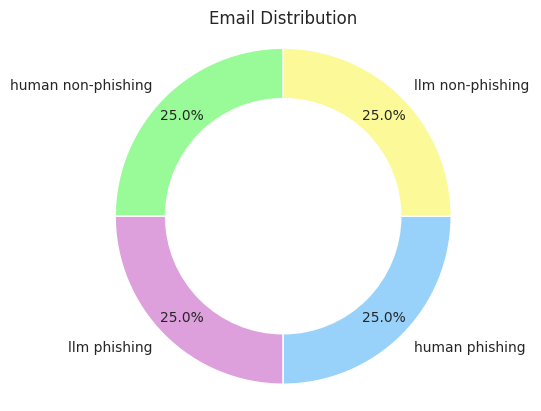

In [13]:
counts = data["label"].value_counts()
fig, ax = plt.subplots()

labels = counts.index
sizes = counts.values
colors = ['#98FB98', '#DDA0DD', '#98d2fb', '#fbf998']

# the donut chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.axis('equal')
ax.set_title('Email Distribution')
plt.show()


The donut chart shows the distribution of emails, indicating an equal proportion of human non-phishing emails and LLM-generated phishing emails.

#### <font color="#e02d36"> **Explanation of the Email Distribution Chart**



The chart shows four segments:
1. **Human Non-Phishing (25%)**: These are real emails that are not trying to trick anyone. They make up 25% of the dataset.
2. **LLM Phishing (25%)**: These are fake emails created by advanced computer programs like ChatGPT and WormGPT. They also make up 25% of the dataset.
3. **Human Phishing (25%)**: These are phishing emails created by people, aiming to deceive the recipient. They account for 25% of the dataset.
4. **LLM Non-Phishing (25%)**: These are real emails created by advanced computer programs that are not trying to trick anyone. They make up the remaining 25% of the dataset.




#### <font color="#e02d36"> **Significance of the Balanced Dataset**

Having a balanced dataset is essential for training machine learning models because it ensures that the model does not become biased towards any one class. In this case, the model will have equal representation from all classes, which helps in learning to differentiate between them effectively.


# <center><u><font color="#257008">   **Text Processing**


In [14]:
#  lemmatizer
lemmatizer = WordNetLemmatizer()

# Dictionary for expanding contractions
contractions = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "won’t": "will not",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}

def expand_contractions(text, contractions):
    # Replace curly apostrophe with straight one
    text = text.replace("’", "'")
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)
    return text

This function expands contractions like don't to do not in the text. It replaces curly apostrophes with straight ones and then uses a dictionary of contractions to expand each contraction found in the text.

In [15]:
def preprocess_text(text):

    # Ensure text is a string
    text = str(text)

    # Remove extra whitespace and convert to lowercase
    text = text.strip().lower()

    # Expand contractions
    text = expand_contractions(text, contractions)

    # Reduce repeated characters
    text = re.sub(r'(.)\1+', r'\1\1', text)

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove newlines & tabs
    text = text.replace("\n", " ").replace("\t", " ")

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Apply preprocess_text function on text column and save it in Processed_text
data["Processed_text"] = data["text"].apply(preprocess_text)

data[["Processed_text" , "text"]].head(10)

,Processed_text,text
0,hi running ir test program max davy need start...,Hi\r\n\r\n\t\tI am running the IR test program...
1,security note trade never ask password via ema...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...
2,trade offer requestgenerated 8 december 627 se...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nTrade ...
3,hi tony sure work manually set end sweet log r...,"Hi Tony\r\nNot sure why it didn't work, but I ..."
4,kindly suggest change dr albert van aardt prin...,Kindly suggest changes\r\n\r\n----------------...
5,hi tony attached time sheet bill lecture usual...,"Hi Tony,\r\n\r\nAttached is the time sheet, we..."
6,begin forwarded message jean meyer date 23 aug...,\r\n\r\nBegin forwarded message:\r\n\r\n> From...
7,hi everyone sent day fear people may able deci...,Hi everyone\r\n\r\nI sent this through the oth...
8,security note trade never ask password via ema...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...
9,security note trade never ask password via ema...,\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...


#### <font color="#e02d36"> **Text Processing**

This function performs these preprocessing steps on the text:

- Ensures the text is a string.
- Strips extra whitespace and converts the text to lowercase.
- Expands contractions using the `expand_contractions` function.
- Reduces repeated characters to two consecutive ones (e.g., "cooool" to "cool").
- Removes punctuation.
- Replaces newlines and tabs with spaces.
- Tokenizes the text into individual words.
- Removes stop words (common words that are usually not important for text analysis, like "and", "the").
- Lemmatizes the words (converts them to their base form, e.g., "running" to "run").



#### <font color="#e02d36"> **Benefit of Text Processing**

Text preprocessing is a critical step in preparing data for machine learning models. It helps us to clean and standardize the text, making it easier for algorithms to process and learn from the data. By following these steps, we ensure that our text data is in the best possible form for training your phishing email detection models.

## <left><font color="#257008"> **Wordcloud of LLM Phishing and  Human Non - Phishing**

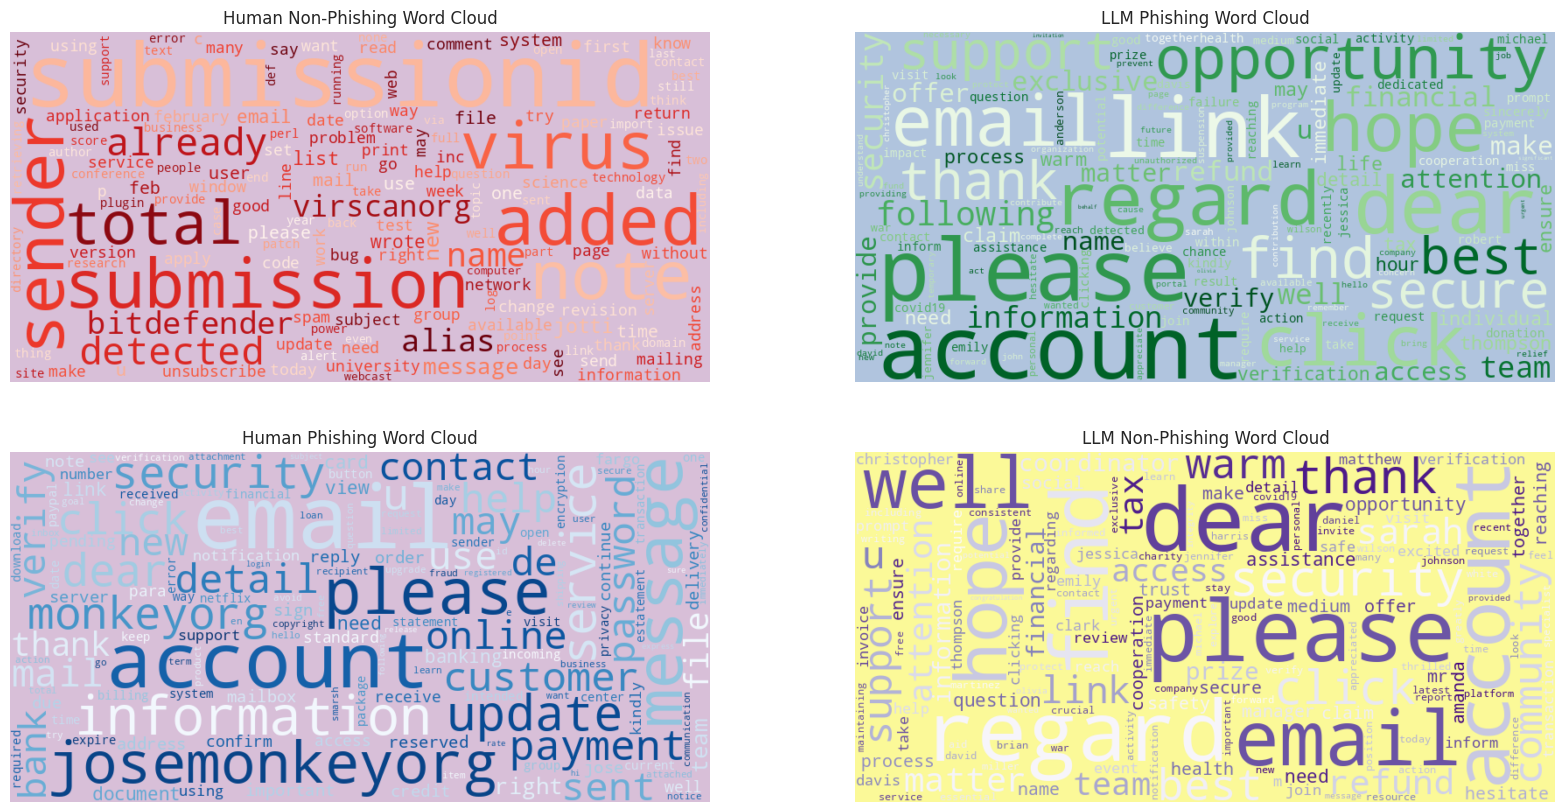

In [16]:
# human non-phishing and llm phishing data
human_non_phishing_data = data[data["label"] == "human non-phishing"]['Processed_text'].str.cat(sep=' ')
llm_phishing_data = data[data["label"] == "llm phishing"]['Processed_text'].str.cat(sep=' ')
human_phishing_data = data[data["label"] == "human phishing"]['Processed_text'].str.cat(sep=' ')
llm_non_phishing_data = data[data["label"] == "llm non-phishing"]['Processed_text'].str.cat(sep=' ')


# wordclouds for all labels data
wordcloud_human_non_phishing_data = WordCloud(width=800,
                           height=400,
                           max_font_size=100,
                           max_words=150,
                           colormap='Reds',
                           stopwords=STOPWORDS,
                           collocations=False,
                           background_color='#D8BFD8').generate(human_non_phishing_data)

wordcloud_llm_phishing_data = WordCloud(width=800,
                          height=400,
                          max_font_size=100,
                          max_words=150,
                          colormap='Greens',
                          stopwords=STOPWORDS,
                          collocations=False,
                          background_color='#B0C4DE').generate(llm_phishing_data)

wordcloud_human_phishing_data = WordCloud(width=800,
                           height=400,
                           max_font_size=100,
                           max_words=150,
                           colormap='Blues',
                           stopwords=STOPWORDS,
                           collocations=False,
                           background_color='#D8BFD8').generate(human_phishing_data)

wordcloud_llm_non_phishing_data = WordCloud(width=800,
                          height=400,
                          max_font_size=100,
                          max_words=150,
                          colormap='Purples',
                          stopwords=STOPWORDS,
                          collocations=False,
                          background_color='#fbf998').generate(llm_non_phishing_data)

# side by side wordcloud
plt.figure(figsize=(20, 10))

# Spam WordCloud
plt.subplot(2, 2, 1)
plt.imshow(wordcloud_human_non_phishing_data, interpolation="bilinear")
plt.axis("off")
plt.title("Human Non-Phishing Word Cloud")

# Ham WordCloud
plt.subplot(2, 2, 2)
plt.imshow(wordcloud_llm_phishing_data, interpolation="bilinear")
plt.axis("off")
plt.title("LLM Phishing Word Cloud")

# Spam WordCloud
plt.subplot(2, 2, 3)
plt.imshow(wordcloud_human_phishing_data, interpolation="bilinear")
plt.axis("off")
plt.title("Human Phishing Word Cloud")

# Ham WordCloud
plt.subplot(2, 2, 4)
plt.imshow(wordcloud_llm_non_phishing_data, interpolation="bilinear")
plt.axis("off")
plt.title("LLM Non-Phishing Word Cloud")
plt.show()


## <left><font color="#257008">  **Explanation of Word Clouds**


#### <font color="#e02d36"> **Human Non-Phishing Word Cloud**

- **Common Words**: Words like submission, note, virus, sender, already, and added are prominent.
- **Context**: These words suggest that the content of legitimate emails often includes topics related to submissions, updates, and technical issues or notifications.
- **Implications**: Legitimate emails may frequently use words related to official communication, such as submissions and technical terminology.

#### <font color="#e02d36"> **LLM Phishing Word Cloud**

- **Common Words**: Words like account, please, link, email, regard, opportunity, and click stand out.
- **Context**: These words indicate that AI-generated phishing emails often focus on urgency and action, such as accessing an account, clicking on a link, or responding to an opportunity.
- **Implications**: Phishing emails generated by AI tend to use persuasive language aimed at prompting immediate action from the recipient.

#### <font color="#e02d36"> **Human Phishing Word Cloud**

- **Common Words**: Words like message, please, security, account, "service", and information are prominent.
- **Context**: These words suggest that phishing emails created by people often emphasize security concerns and the need for action regarding accounts or services.
- **Implications**: Human-created phishing emails often use language that creates a sense of urgency and concern, encouraging recipients to take immediate action.

#### <font color="#e02d36"> **LLM Non-Phishing Word Cloud**

- **Common Words**: Words like regard, please, hope, account, thank, and email are prominent.
- **Context**: These words indicate that legitimate emails created by AI often use polite and formal language, similar to human-created non-phishing emails.
- **Implications**: Legitimate emails from AI typically include polite expressions and formal communication, focusing on information sharing and courteous interaction.

## <left><font color="#257008"> **Label Encode the Target Variable**


Convert categorical labels into numeric.

In [17]:
# function to map labels to integers
def label_to_int(label):
    mapping = {
        'human non-phishing': 0,
        'llm phishing': 1,
        'human phishing': 2,
        'llm non-phishing': 3
    }
    return mapping[label]

# label column converting to numerical value
data['label'] = data['label'].apply(label_to_int)


In [18]:
data["label"].unique()

array([0, 1, 2, 3])

## <left><font color="#257008"> **Separeate the variables into feature matrix (X) and target variable (y)**

Split the dataset into features (processed text) and target labels.

In [44]:
# Separeate the variables into feature matrix (X) and target variable (y)
X = data['Processed_text']
y = data["label"]



## <left><font color="#5a088c"> **Explanation**:

- **Purpose**: To split the dataset into features (X) and the target variable (y).
- **X** contains the preprocessed text data, and **y** contains the corresponding labels.

## <left><font color="#257008"> **Splitting the data for Training and Testing**

Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [45]:
# Splitting the data for Training and Testing (Test size=30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## <left><font color="#5a088c"> **Explanation**:
- To split the dataset into training and testing sets, ensuring that the model can be evaluated on unseen data.
- The **train_test_split** function from **sklearn.model_selection** is used to split the data. 30% of the data is used for testing, and the random state ensures reproducibility.

## <left><font color="#257008"> **Vectorize the Messages**

Transform the text data into numerical vectors using TF-IDF, which captures the importance of words in the documents.

In [46]:
# Vectorize the Messages
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Convert sparse matrix to dense
X_train_dense = X_train_vec.toarray()
X_test_dense = X_test_vec.toarray()

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## <left><font color="#5a088c"> **Explanation**:

- To convert the text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.
-  `TfidfVectorizer` from `sklearn.feature_extraction.text` is used to transform the text data into vectors. The `max_features` parameter limits the number of features to 1000, which helps in managing computational complexity.


## <left><font color="#257008"> **Dimensionality Reduction**


Now we are applying **Truncated SVD (Latent Semantic Analysis)** after vectorization to reduce the dimensionality of our feature space. This can be considered a form of feature selection tailored to high-dimensional data like text.

In [47]:
svd = TruncatedSVD(n_components=50)
X_train_reduced = svd.fit_transform(X_train_dense)
X_test_reduced = svd.transform(X_test_dense)

In [48]:
# Save the SVD model
joblib.dump(svd, 'svd_model.pkl')

['svd_model.pkl']



These preprocessing steps are essential to prepare the text data for training machine learning models. By label encoding the target variable, separating the features and labels, splitting the data into training and testing sets, and vectorizing the text data, you ensure that the machine learning models can effectively learn patterns and make accurate predictions.


## <left><font color="#fc3503"> **DecisionTreeClassifier**

                    DecisionTreeClassifier Model Evaluation                     
Accuracy:      0.907
Precision:     0.907
Recall:        0.907
F1-score:      0.906
Training Time: 0.253 seconds

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       315
           1       0.87      0.80      0.84       307
           2       0.95      0.97      0.96       294
           3       0.82      0.88      0.85       284

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200



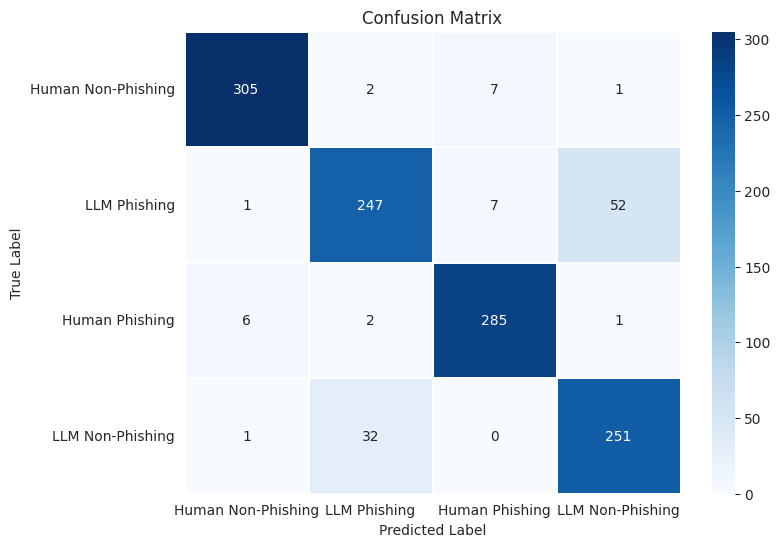

In [49]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()

# Start time
start_time = time.time()
model.fit(X_train_reduced, y_train)

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the model
joblib.dump(model, 'best_DecisionTreeClassifier_model.h5')

# Print evaluation metrics
print('=' * 80)
print(f'DecisionTreeClassifier Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2,  cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
decision_tree_metrics = {
    'Model Name': 'DecisionTreeClassifier',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}

## <left><font color="#5a088c"> **Model Evaluation and Results: Decision Tree Classifier**

The Decision Tree Classifier model was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 305 correctly identified, with a precision of 0.97 and recall of 0.97.
- **LLM Phishing**: 247 correctly identified, with a precision of 0.87 and recall of 0.80.
- **Human Phishing**: 285 correctly identified, with a precision of 0.95 and recall of 0.97.
- **LLM Non-Phishing**: 251 correctly identified, with a precision of 0.82 and recall of 0.88.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.907
- **Precision**: 0.907
- **Recall**: 0.907
- **F1-score**: 0.906
- **Training Time**: 0.253 seconds

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.97
  - Recall: 0.97
  - F1-score: 0.97
- **Class 1 (LLM Phishing)**:
  - Precision: 0.87
  - Recall: 0.80
  - F1-score: 0.84
- **Class 2 (Human Phishing)**:
  - Precision: 0.95
  - Recall: 0.97
  - F1-score: 0.96
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.82
  - Recall: 0.88
  - F1-score: 0.85

# <center><font color="#fc3503"> **Decision Tree Classifier with Hyperparameter Tuning**

Fitting 5 folds for each of 180 candidates, totalling 900 fits
                 Tuned DecisionTreeClassifier Model Evaluation                  
Accuracy:      0.912
Precision:     0.912
Recall:        0.912
F1-score:      0.912
Training Time: 104.634 seconds
                     Best Parameters Found by GridSearchCV                      
criterion: entropy
max_depth: 30
min_samples_leaf: 1
min_samples_split: 2

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       315
           1       0.84      0.87      0.85       307
           2       0.97      0.98      0.98       294
           3       0.85      0.82      0.83       284

    accuracy                           0.91      1200
   macro avg       0.91      0.91      0.91      1200
weighted avg       0.91      0.91      0.91      1200



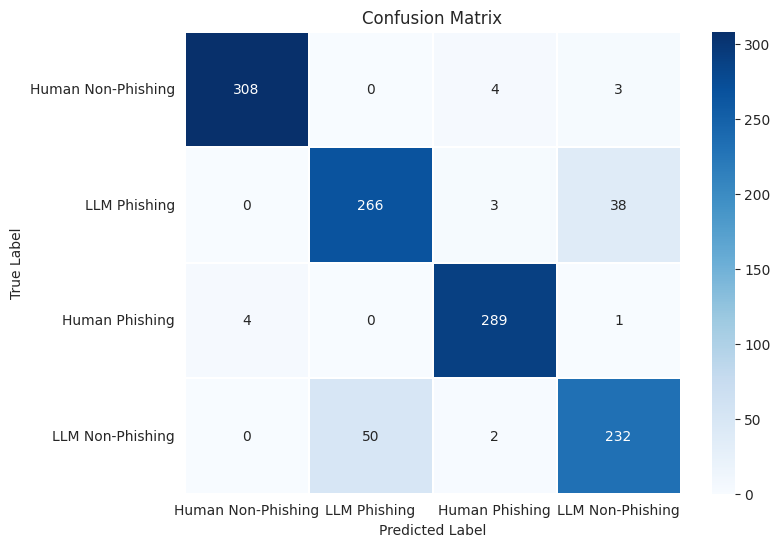

In [50]:
# parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Start time
start_time = time.time()

# Fit the grid search model
grid_search.fit(X_train_reduced, y_train)

# best estimator
model = grid_search.best_estimator_

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the best model
joblib.dump(model, 'best_DecisionTreeClassifier_model_tuned.h5')

# Best parameters from grid search
best_params = grid_search.best_params_


# Print evaluation metrics
print('=' * 80)
print(f'Tuned DecisionTreeClassifier Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')

# Print the best parameters
print('=' * 80)
print(f'Best Parameters Found by GridSearchCV'.center(80))
print('=' * 80)
for param, value in best_params.items():
    print(f'{param}: \033[1m{value}\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2, cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
decision_tree_metrics_tuned = {
    'Model Name': 'Tuned DecisionTreeClassifier',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}


## <left><font color="#5a088c"> **Model Evaluation and Results: Tuned Decision Tree Classifier**

The Tuned Decision Tree Classifier model, optimized through GridSearchCV, was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 308 correctly identified, with a precision of 0.99 and recall of 0.98.
- **LLM Phishing**: 266 correctly identified, with a precision of 0.84 and recall of 0.87.
- **Human Phishing**: 289 correctly identified, with a precision of 0.97 and recall of 0.98.
- **LLM Non-Phishing**: 232 correctly identified, with a precision of 0.85 and recall of 0.82.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.912
- **Precision**: 0.912
- **Recall**: 0.912
- **F1-score**: 0.912
- **Training Time**: 104.634 seconds

## <left><font color="#257008"> **Best Parameters Found by GridSearchCV**

- **Criterion**: Entropy
- **Max Depth**: 30
- **Min Samples Leaf**: 1
- **Min Samples Split**: 2

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.99
  - Recall: 0.98
  - F1-score: 0.98
- **Class 1 (LLM Phishing)**:
  - Precision: 0.85
  - Recall: 0.87
  - F1-score: 0.85
- **Class 2 (Human Phishing)**:
  - Precision: 0.97
  - Recall: 0.98
  - F1-score: 0.98
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.85
  - Recall: 0.82
  - F1-score: 0.83

# <center><font color="#fc3503"> **Support Vector Machine Classifer (SVM)**

                 Support Vector Machine (SVM) Model Evaluation                  
Accuracy:      0.973
Precision:     0.973
Recall:        0.973
F1-score:      0.972
Training Time: 0.203 seconds

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       315
           1       0.96      0.97      0.97       307
           2       0.98      0.98      0.98       294
           3       0.97      0.96      0.96       284

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



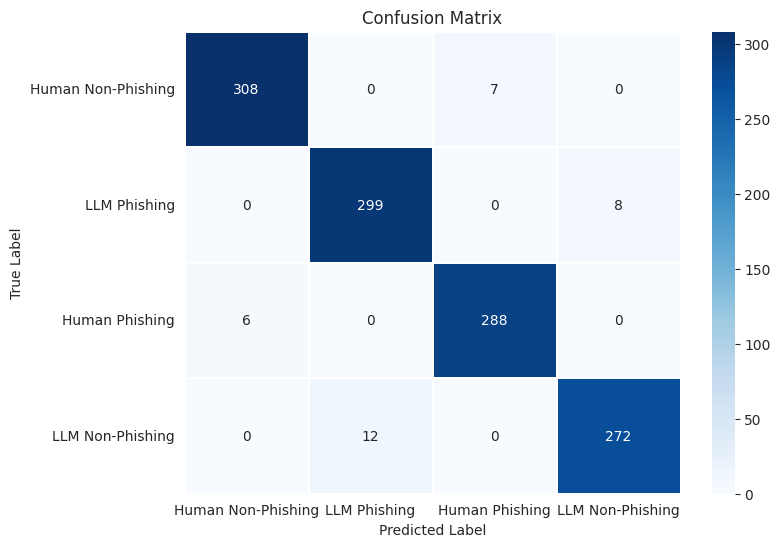

In [51]:
# Support Vector Machine Classifier
model = SVC()

# Start time
start_time = time.time()

# Train the model on the training data
model.fit(X_train_reduced, y_train)

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the model
joblib.dump(model, 'best_SVM_model.h5')

# Print evaluation metrics
print('=' * 80)
print(f'Support Vector Machine (SVM) Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2, cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
svm_metrics = {
    'Model Name': 'Support Vector Machine Classifier (SVM)',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}

## <left><font color="#5a088c"> **Model Evaluation and Results: Support Vector Machine (SVM) Classifier**

The Support Vector Machine (SVM) Classifier model was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 308 correctly identified, with a precision of 0.98 and recall of 0.98.
- **LLM Phishing**: 299 correctly identified, with a precision of 0.96 and recall of 0.97.
- **Human Phishing**: 288 correctly identified, with a precision of 0.98 and recall of 0.98.
- **LLM Non-Phishing**: 272 correctly identified, with a precision of 0.97 and recall of 0.96.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.973
- **Precision**: 0.973
- **Recall**: 0.973
- **F1-score**: 0.972
- **Training Time**: 0.203 seconds

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98
- **Class 1 (LLM Phishing)**:
  - Precision: 0.96
  - Recall: 0.97
  - F1-score: 0.97
- **Class 2 (Human Phishing)**:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.97
  - Recall: 0.96
  - F1-score: 0.96

# <center><font color="#fc3503"> **Support Vector Machine Classifier with Hyperparameter Tuning**

Fitting 5 folds for each of 32 candidates, totalling 160 fits
              Tuned Support Vector Machine (SVM) Model Evaluation               
Accuracy:      0.976
Precision:     0.976
Recall:        0.976
F1-score:      0.976
Training Time: 32.114 seconds
                     Best Parameters Found by GridSearchCV                      
C: 10
gamma: 1
kernel: rbf

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       315
           1       0.96      0.98      0.97       307
           2       0.97      0.99      0.98       294
           3       0.97      0.96      0.97       284

    accuracy                           0.98      1200
   macro avg       0.98      0.98      0.98      1200
weighted avg       0.98      0.98      0.98      1200



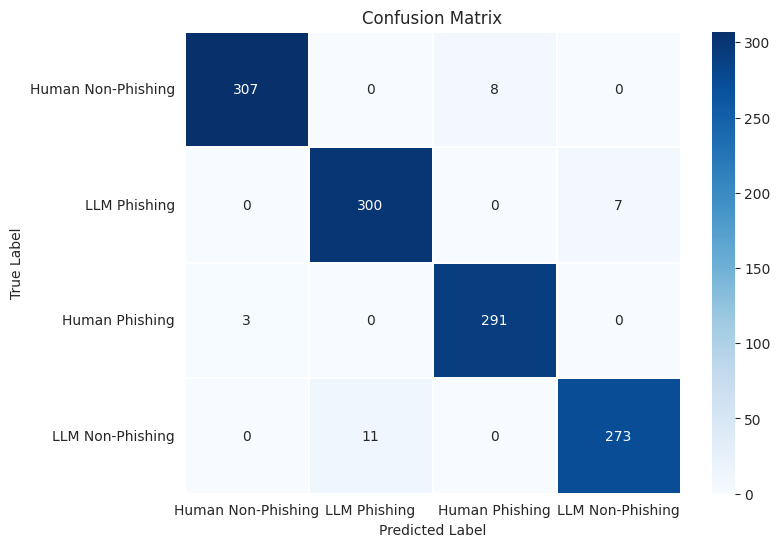

In [52]:
# parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Start time
start_time = time.time()

# Fit the grid search model
grid_search.fit(X_train_reduced, y_train)

# best estimator
model = grid_search.best_estimator_

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the best model
joblib.dump(model, 'best_SVM_model_tuned.h5')

# Best parameters from grid search
best_params = grid_search.best_params_

# Print evaluation metrics
print('=' * 80)
print(f'Tuned Support Vector Machine (SVM) Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')
# Print the best parameters
print('=' * 80)
print(f'Best Parameters Found by GridSearchCV'.center(80))
print('=' * 80)
for param, value in best_params.items():
    print(f'{param}: \033[1m{value}\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2, cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
svm_metrics_tuned = {
    'Model Name': 'Tuned Support Vector Machine Classifier (SVM)',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}


## <left><font color="#5a088c"> **Model Evaluation and Results: Tuned Support Vector Machine (SVM) Classifier**

The Tuned Support Vector Machine (SVM) Classifier model, optimized through GridSearchCV, was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 307 correctly identified, with a precision of 0.99 and recall of 0.97.
- **LLM Phishing**: 300 correctly identified, with a precision of 0.96 and recall of 0.98.
- **Human Phishing**: 291 correctly identified, with a precision of 0.97 and recall of 0.99.
- **LLM Non-Phishing**: 273 correctly identified, with a precision of 0.97 and recall of 0.96.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.976
- **Precision**: 0.976
- **Recall**: 0.976
- **F1-score**: 0.976
- **Training Time**: 32.114 seconds

## <left><font color="#257008"> **Best Parameters Found by GridSearchCV**

- **C**: 10
- **Gamma**: 1
- **Kernel**: RBF (Radial Basis Function)

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.99
  - Recall: 0.97
  - F1-score: 0.98
- **Class 1 (LLM Phishing)**:
  - Precision: 0.96
  - Recall: 0.98
  - F1-score: 0.97
- **Class 2 (Human Phishing)**:
  - Precision: 0.97
  - Recall: 0.99
  - F1-score: 0.98
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.97
  - Recall: 0.96
  - F1-score: 0.97

# <center><font color="#fc3503"> **Random Forest Classifier**

                   Random Forest Classifier Model Evaluation                    
Accuracy:      0.969
Precision:     0.969
Recall:        0.969
F1-score:      0.969
Training Time: 2.071 seconds

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       315
           1       0.95      0.95      0.95       307
           2       0.98      0.98      0.98       294
           3       0.96      0.96      0.96       284

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



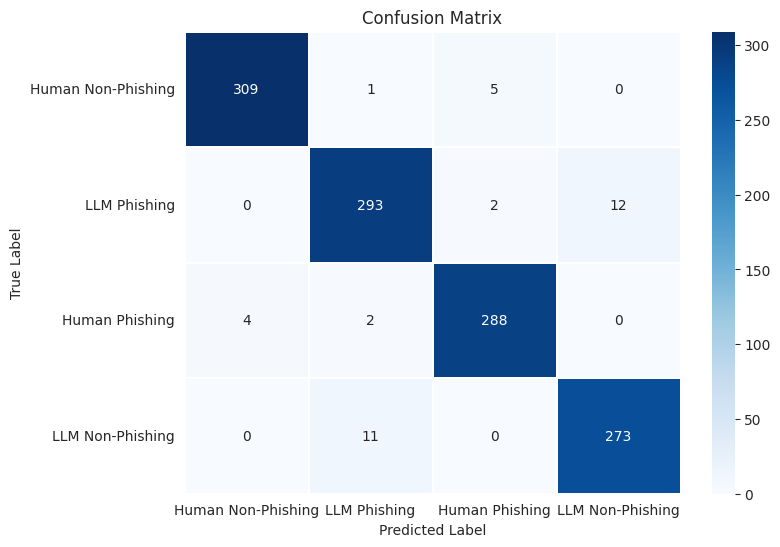

In [53]:
# Random Forest Classifier
model = RandomForestClassifier()

# Start time
start_time = time.time()

# Train the model on the training data
model.fit(X_train_reduced, y_train)

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# Compute evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the model
joblib.dump(model, 'best_RandomForestClassifier_model.h5')

# Print evaluation metrics
print('=' * 80)
print(f'Random Forest Classifier Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2, cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
random_forest_metrics = {
    'Model Name': 'Random Forest Classifier',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}

## <left><font color="#5a088c"> **Model Evaluation and Results: Random Forest Classifier**

The Random Forest Classifier model was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 309 correctly identified, with a precision of 0.99 and recall of 0.98.
- **LLM Phishing**: 293 correctly identified, with a precision of 0.95 and recall of 0.95.
- **Human Phishing**: 288 correctly identified, with a precision of 0.98 and recall of 0.98.
- **LLM Non-Phishing**: 273 correctly identified, with a precision of 0.96 and recall of 0.96.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.969
- **Precision**: 0.969
- **Recall**: 0.969
- **F1-score**: 0.969
- **Training Time**: 2.071 seconds

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.99
  - Recall: 0.98
  - F1-score: 0.98
- **Class 1 (LLM Phishing)**:
  - Precision: 0.95
  - Recall: 0.95
  - F1-score: 0.95
- **Class 2 (Human Phishing)**:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.96
  - Recall: 0.96
  - F1-score: 0.96

# <center><font color="#fc3503"> **Random Forest Classifier with Hyperparameter Tuning**

Fitting 5 folds for each of 8 candidates, totalling 40 fits
                Tuned Random Forest Classifier Model Evaluation                 
Accuracy:      0.973
Precision:     0.973
Recall:        0.973
F1-score:      0.973
Training Time: 73.782 seconds
                     Best Parameters Found by GridSearchCV                      
max_depth: 20
min_samples_split: 2
n_estimators: 200

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       315
           1       0.96      0.95      0.96       307
           2       0.98      0.99      0.99       294
           3       0.95      0.96      0.96       284

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



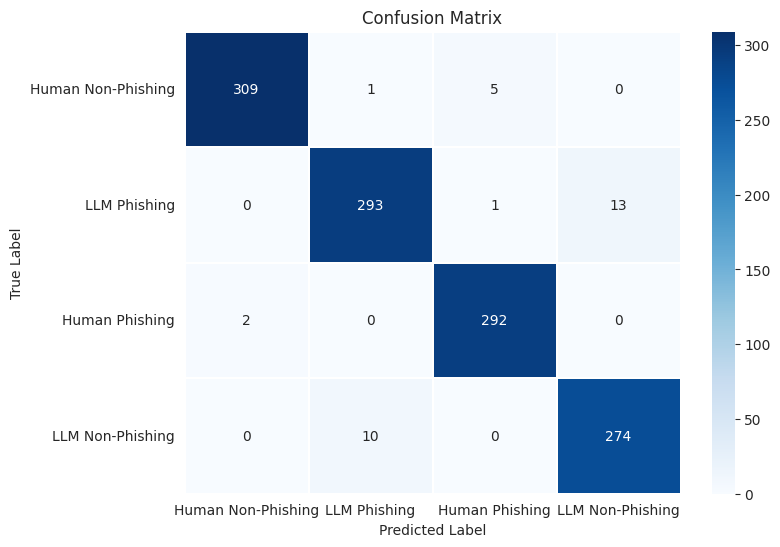

In [54]:
# parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

# GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Start time
start_time = time.time()

# Fit the grid search model
grid_search.fit(X_train_reduced, y_train)

# Get the best estimator
model = grid_search.best_estimator_

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the best model
joblib.dump(model, 'best_RandomForestClassifier_model_tuned.h5')

# Best parameters from grid search
best_params = grid_search.best_params_

# Print evaluation metrics
print('=' * 80)
print(f'Tuned Random Forest Classifier Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')
# Print the best parameters
print('=' * 80)
print(f'Best Parameters Found by GridSearchCV'.center(80))
print('=' * 80)
for param, value in best_params.items():
    print(f'{param}: \033[1m{value}\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2, cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
random_forest_metrics_tuned = {
    'Model Name': 'Tuned Random Forest Classifier',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}


## <left><font color="#5a088c"> **Model Evaluation and Results: Tuned Random Forest Classifier**

The Tuned Random Forest Classifier model, optimized through GridSearchCV, was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 309 correctly identified, with a precision of 0.99 and recall of 0.98.
- **LLM Phishing**: 293 correctly identified, with a precision of 0.96 and recall of 0.95.
- **Human Phishing**: 292 correctly identified, with a precision of 0.98 and recall of 0.99.
- **LLM Non-Phishing**: 274 correctly identified, with a precision of 0.95 and recall of 0.96.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.973
- **Precision**: 0.973
- **Recall**: 0.973
- **F1-score**: 0.973
- **Training Time**: 73.782 seconds

## <left><font color="#257008"> **Best Parameters Found by GridSearchCV**

- **Max Depth**: 20
- **Min Samples Split**: 2
- **Number of Estimators**: 200

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.99
  - Recall: 0.98
  - F1-score: 0.99
- **Class 1 (LLM Phishing)**:
  - Precision: 0.96
  - Recall: 0.95
  - F1-score: 0.96
- **Class 2 (Human Phishing)**:
  - Precision: 0.98
  - Recall: 0.99
  - F1-score: 0.99
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.95
  - Recall: 0.96
  - F1-score: 0.96

# <center><font color="#fc3503"> **Gradient Boosting Classifier**

                 Gradient Boosting Classifier Model Evaluation                  
Accuracy:      0.967
Precision:     0.967
Recall:        0.967
F1-score:      0.967
Training Time: 22.640 seconds

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       315
           1       0.94      0.96      0.95       307
           2       0.98      0.98      0.98       294
           3       0.96      0.94      0.95       284

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



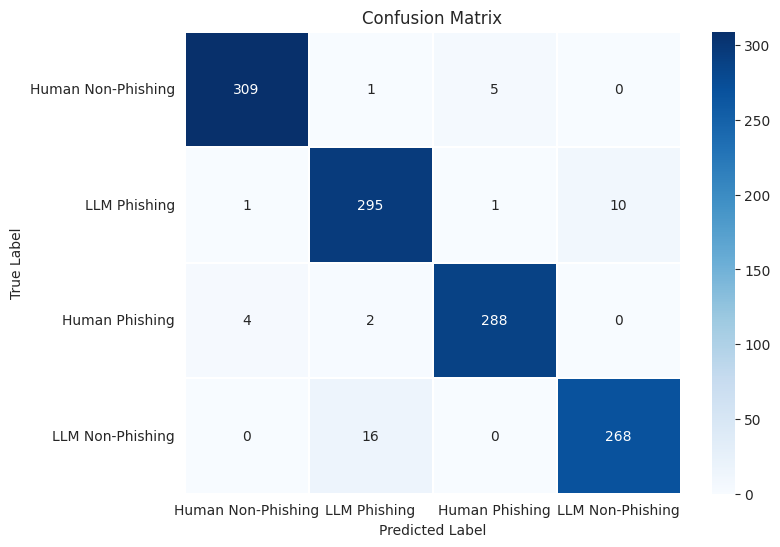

In [55]:
# Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Start time
start_time = time.time()

# Train the model on the training data
model.fit(X_train_reduced, y_train)

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the model
joblib.dump(model, 'best_GradientBoostingClassifier_model.h5')

# Print evaluation metrics
print('=' * 80)
print(f'Gradient Boosting Classifier Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2, cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
gradient_boosting_metrics = {
    'Model Name': 'Gradient Boosting Classifier',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}


## <left><font color="#5a088c"> **Model Evaluation and Results: Gradient Boosting Classifier**

The Gradient Boosting Classifier model was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 309 correctly identified, with a precision of 0.98 and recall of 0.98.
- **LLM Phishing**: 295 correctly identified, with a precision of 0.94 and recall of 0.96.
- **Human Phishing**: 288 correctly identified, with a precision of 0.98 and recall of 0.98.
- **LLM Non-Phishing**: 268 correctly identified, with a precision of 0.96 and recall of 0.94.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.967
- **Precision**: 0.967
- **Recall**: 0.967
- **F1-score**: 0.967
- **Training Time**: 22.640 seconds

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98
- **Class 1 (LLM Phishing)**:
  - Precision: 0.94
  - Recall: 0.96
  - F1-score: 0.95
- **Class 2 (Human Phishing)**:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.96
  - Recall: 0.94
  - F1-score: 0.95

# <center><font color="#fc3503"> **Gradient Boosting Classifier with Hyperparameter Tuning**

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              Tuned Gradient Boosting Classifier Model Evaluation               
Accuracy:      0.968
Precision:     0.968
Recall:        0.968
F1-score:      0.967
Training Time: 1472.071 seconds
                     Best Parameters Found by GridSearchCV                      
max_depth: 5
min_samples_split: 5
n_estimators: 300

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       315
           1       0.95      0.95      0.95       307
           2       0.97      0.98      0.98       294
           3       0.96      0.95      0.96       284

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



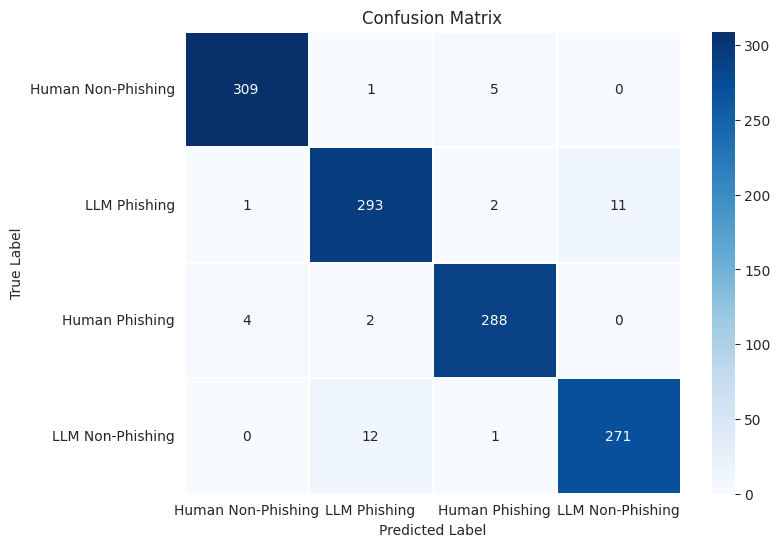

In [56]:
# parameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
}

# GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Start time
start_time = time.time()

# Fit the grid search model
grid_search.fit(X_train_reduced, y_train)

# Get the best estimator
model = grid_search.best_estimator_

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the best model
joblib.dump(model, 'best_GradientBoostingClassifier_model_tuned.h5')

# Best parameters from grid search
best_params = grid_search.best_params_


# Print evaluation metrics
print('=' * 80)
print(f'Tuned Gradient Boosting Classifier Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')
# Print the best parameters
print('=' * 80)
print(f'Best Parameters Found by GridSearchCV'.center(80))
print('=' * 80)
for param, value in best_params.items():
    print(f'{param}: \033[1m{value}\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2, cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
gradient_boosting_metrics_tuned = {
    'Model Name': 'Tuned Gradient Boosting Classifier',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}


## <left><font color="#5a088c"> **Model Evaluation and Results: Tuned Gradient Boosting Classifier**

The Tuned Gradient Boosting Classifier model, optimized through GridSearchCV, was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 309 correctly identified, with a precision of 0.98 and recall of 0.98.
- **LLM Phishing**: 293 correctly identified, with a precision of 0.95 and recall of 0.95.
- **Human Phishing**: 288 correctly identified, with a precision of 0.97 and recall of 0.98.
- **LLM Non-Phishing**: 271 correctly identified, with a precision of 0.96 and recall of 0.95.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.968
- **Precision**: 0.968
- **Recall**: 0.968
- **F1-score**: 0.967
- **Training Time**: 1472.071 seconds

## <left><font color="#257008"> **Best Parameters Found by GridSearchCV**

- **Max Depth**: 5
- **Min Samples Split**: 5
- **Number of Estimators**: 300

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.98
  - Recall: 0.98
  - F1-score: 0.98
- **Class 1 (LLM Phishing)**:
  - Precision: 0.95
  - Recall: 0.95
  - F1-score: 0.95
- **Class 2 (Human Phishing)**:
  - Precision: 0.97
  - Recall: 0.98
  - F1-score: 0.98
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.96
  - Recall: 0.95
  - F1-score: 0.96

# <center><font color="#fc3503"> **K-Nearest Neighbors (KNN)**

                   K-Nearest Neighbors (KNN) Model Evaluation                   
Accuracy:      0.968
Precision:     0.969
Recall:        0.968
F1-score:      0.968
Training Time: 0.048 seconds

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       315
           1       0.97      0.95      0.96       307
           2       0.98      0.95      0.97       294
           3       0.96      0.98      0.97       284

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



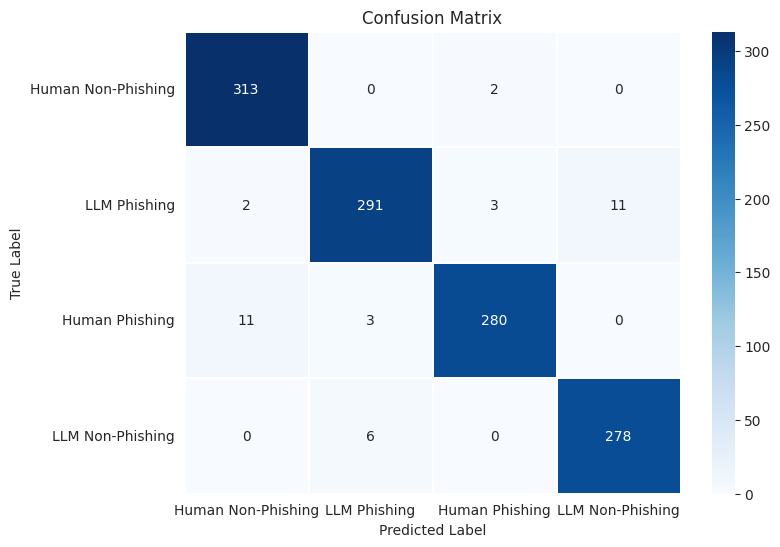

In [57]:
# K-Nearest Neighbors Classifier
model = KNeighborsClassifier()

# Start time
start_time = time.time()

# Train the model on the training data
model.fit(X_train_reduced, y_train)

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the model
joblib.dump(model, 'best_KNN_model.h5')

# Print evaluation metrics
print('=' * 80)
print(f'K-Nearest Neighbors (KNN) Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2, cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
knn_metrics = {
    'Model Name': 'K-Nearest Neighbors (KNN)',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}


## <left><font color="#5a088c"> **Model Evaluation and Results: K-Nearest Neighbors (KNN) Classifier**

The K-Nearest Neighbors (KNN) Classifier model was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 313 correctly identified, with a precision of 0.96 and recall of 0.99.
- **LLM Phishing**: 291 correctly identified, with a precision of 0.97 and recall of 0.95.
- **Human Phishing**: 280 correctly identified, with a precision of 0.98 and recall of 0.95.
- **LLM Non-Phishing**: 278 correctly identified, with a precision of 0.96 and recall of 0.98.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.968
- **Precision**: 0.969
- **Recall**: 0.968
- **F1-score**: 0.968
- **Training Time**: 0.048 seconds

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.96
  - Recall: 0.99
  - F1-score: 0.98
- **Class 1 (LLM Phishing)**:
  - Precision: 0.97
  - Recall: 0.95
  - F1-score: 0.96
- **Class 2 (Human Phishing)**:
  - Precision: 0.98
  - Recall: 0.95
  - F1-score: 0.97
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.96
  - Recall: 0.98
  - F1-score: 0.97

# <center><font color="#fc3503"> **K-Nearest Neighbors (KNN) with Hyperparameter Tuning**

Fitting 5 folds for each of 6 candidates, totalling 30 fits
                Tuned K-Nearest Neighbors (KNN) Model Evaluation                
Accuracy:      0.964
Precision:     0.964
Recall:        0.964
F1-score:      0.964
Training Time: 1.171 seconds
                     Best Parameters Found by GridSearchCV                      
metric: euclidean
n_neighbors: 3

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       315
           1       0.97      0.94      0.96       307
           2       0.97      0.96      0.96       294
           3       0.96      0.97      0.97       284

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



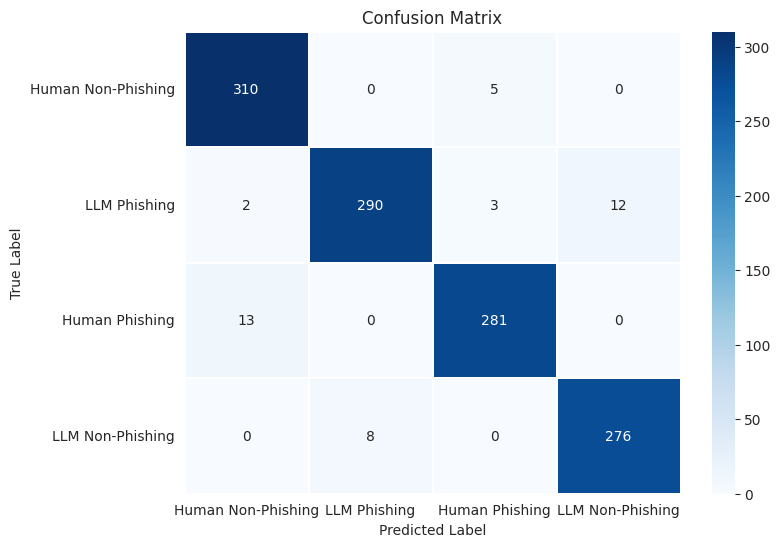

In [58]:
# parameter grid
param_grid = {
    'n_neighbors': [3, 5],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Start time
start_time = time.time()

# Fit the grid search model
grid_search.fit(X_train_reduced, y_train)

# best estimator
model = grid_search.best_estimator_

# Predict on the test data
y_pred = model.predict(X_test_reduced)

# evaluation metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Time taken for training and evaluation
training_time = time.time() - start_time

# Save the best model
joblib.dump(model, 'best_KNN_model_tuned.h5')

# Best parameters from grid search
best_params = grid_search.best_params_


# Print evaluation metrics
print('=' * 80)
print(f'Tuned K-Nearest Neighbors (KNN) Model Evaluation'.center(80))
print('=' * 80)
print(f'Accuracy:      \033[1m{acc:.3f}\033[0m')
print(f'Precision:     \033[1m{precision:.3f}\033[0m')
print(f'Recall:        \033[1m{recall:.3f}\033[0m')
print(f'F1-score:      \033[1m{f1:.3f}\033[0m')
print(f'Training Time: \033[1m{training_time:.3f} seconds\033[0m')
# Print the best parameters
print('=' * 80)
print(f'Best Parameters Found by GridSearchCV'.center(80))
print('=' * 80)
for param, value in best_params.items():
    print(f'{param}: \033[1m{value}\033[0m')
print('=' * 80)

# Classification report
print('\n\033[1mClassification Report:\033[0m\n')
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.2, cmap='Blues',
            xticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"],
            yticklabels=["Human Non-Phishing", "LLM Phishing", "Human Phishing", "LLM Non-Phishing"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Store the evaluation metrics
knn_metrics_tuned = {
    'Model Name': 'Tuned K-Nearest Neighbors (KNN)',
    'Accuracy Score': acc,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Training Time': training_time
}


## <left><font color="#5a088c"> **Model Evaluation and Results: Tuned K-Nearest Neighbors (KNN) Classifier**

The Tuned K-Nearest Neighbors (KNN) Classifier model, optimized through GridSearchCV, was used to classify AI-generated phishing emails, human non-phishing emails, human phishing emails, and AI-generated non-phishing emails.

## <left><font color="#257008"> **Confusion Matrix Summary**

- **Human Non-Phishing**: 310 correctly identified, with a precision of 0.95 and recall of 0.98.
- **LLM Phishing**: 290 correctly identified, with a precision of 0.97 and recall of 0.94.
- **Human Phishing**: 281 correctly identified, with a precision of 0.97 and recall of 0.96.
- **LLM Non-Phishing**: 276 correctly identified, with a precision of 0.96 and recall of 0.97.

## <left><font color="#257008"> **Model Performance Metrics**

- **Accuracy**: 0.964
- **Precision**: 0.964
- **Recall**: 0.964
- **F1-score**: 0.964
- **Training Time**: 1.171 seconds

## <left><font color="#257008"> **Best Parameters Found by GridSearchCV**

- **Metric**: Euclidean
- **Number of Neighbors**: 3

## <left><font color="#257008"> **Classification Report**

- **Class 0 (Human Non-Phishing)**:
  - Precision: 0.95
  - Recall: 0.98
  - F1-score: 0.97
- **Class 1 (LLM Phishing)**:
  - Precision: 0.97
  - Recall: 0.94
  - F1-score: 0.96
- **Class 2 (Human Phishing)**:
  - Precision: 0.97
  - Recall: 0.96
  - F1-score: 0.96
- **Class 3 (LLM Non-Phishing)**:
  - Precision: 0.96
  - Recall: 0.97
  - F1-score: 0.97

## <left><font color="#5a088c"> **All Model Evaluation**

In this project, We evaluated five different classifiers with hyperparameters tuninng also: Decision tree, Support Vector Machine (SVM), Gradient Boosting , KNN and Random Forest. Here, we summarize and compare the performance of these models based on various metrics, including accuracy, precision, recall, F1-score and training time




In [59]:
# All models evaluation
eva_df = pd.DataFrame([
    decision_tree_metrics,
    svm_metrics,
    random_forest_metrics,
    knn_metrics,
    gradient_boosting_metrics,
    decision_tree_metrics_tuned,
    svm_metrics_tuned,
    random_forest_metrics_tuned,
    knn_metrics_tuned,
    gradient_boosting_metrics_tuned
])

eva_df.set_index('Model Name', inplace=True)
eva_df

,Accuracy Score,Precision,Recall,F1-score,Training Time
Model Name,,,,,
DecisionTreeClassifier,0.906667,0.907373,0.906667,0.906389,0.253388
Support Vector Machine Classifier (SVM),0.972500,0.972537,0.972500,0.972495,0.202995
Random Forest Classifier,0.969167,0.969200,0.969167,0.969179,2.070634
K-Nearest Neighbors (KNN),0.968333,0.968551,0.968333,0.968259,0.047691
Gradient Boosting Classifier,0.966667,0.966827,0.966667,0.966689,22.640116
Tuned DecisionTreeClassifier,0.912500,0.912478,0.912500,0.912363,104.634436
Tuned Support Vector Machine Classifier (SVM),0.975833,0.975939,0.975833,0.975831,32.114043
Tuned Random Forest Classifier,0.973333,0.973402,0.973333,0.973334,73.781536
Tuned K-Nearest Neighbors (KNN),0.964167,0.964373,0.964167,0.964125,1.171091


## <left><font color="#257008"> **Conclusion**

Based on the results shown in the table, it is clear that tuning the hyperparameters of the machine learning models generally improved their performance. The **Tuned Support Vector Machine (SVM) Classifier** performed very well, with an accuracy of **97.50%**.

Among the models that were not tuned, the **Support Vector Machine Classifier (SVM)** performed the best, with an accuracy of **97.22%**. The **Decision Tree Classifier** had the lowest accuracy among all models, both before and after tuning, indicating that more complex models generally provide better results for this dataset.

In conclusion, while hyperparameter tuning enhances model performance, it also increases the training time, especially for more complex models like Gradient Boosting.

## <left><font color="#5a088c"> **Future Work**

- **Hyperparameter Tuning**: Further tuning of the hyperparameters for each model could potentially improve their performance.
- **Ensemble Methods**: Combining multiple models through ensemble methods could yield even better results.
- **Real-Time Implementation**: Implementing these models in real-time email filtering systems to evaluate their performance in a live environment.
- **Expanding the Dataset**: Using a larger and more diverse dataset to train the models could improve their generalization capabilities and robustness.

This project demonstrates the effectiveness of machine learning models in combating AI-generated phishing emails, a growing threat in the cybersecurity landscape. By continuously improving and adapting these models, we can enhance our defenses against sophisticated cyber threats.